In [ ]:
df.head()


,State,Current Smoking,Overweight,Fruit/Vegs,Physically Inactive,Rate
0,Alabama,24.6,35.8,76.1,29.7,195
1,Alaska,26.1,36.2,76.9,23.5,130
2,Arizona,21.9,22.5,90.9,51.3,142
3,Arkansas,25.9,33.4,72.1,35.9,193
4,California,19.2,31.0,72.5,25.5,148


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the original dataset
df_orig = pd.read_csv('CDCHeartRisk2.csv')


# Select the predictor variables
X_orig = df_orig[['Current Smoking', 'Overweight', 'Physically Inactive', 'Fruit/Vegs']]
X_orig = sm.add_constant(X_orig)

# Select the response variable
y_orig = df_orig['Rate']

# Fit the multiple regression model to the original dataset
model_orig = sm.OLS(y_orig, X_orig).fit()
print(model_orig.summary())

# Load the more recent dataset
df_recent = pd.read_csv('new_data.csv')

# Select the predictor variables
X_recent = df_recent[['Current Smoking', 'Overweight (%)', 'Physically Inactive (%)', 'Fruit/Veg Intake (servings/day)']]
X_recent = sm.add_constant(X_recent)

# Select the response variable
y_recent = df_recent['Rate']

# Fit the multiple regression model to the recent dataset
model_recent = sm.OLS(y_recent, X_recent).fit()
print(model_recent.summary())

# Compare the coefficients of the two models
print("Coefficients of original model:\n", model_orig.params)
print("Coefficients of recent model:\n", model_recent.params)


                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     17.97
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.98e-09
Time:                        08:12:27   Log-Likelihood:                -212.61
No. Observations:                  51   AIC:                             435.2
Df Residuals:                      46   BIC:                             444.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -34.0885    

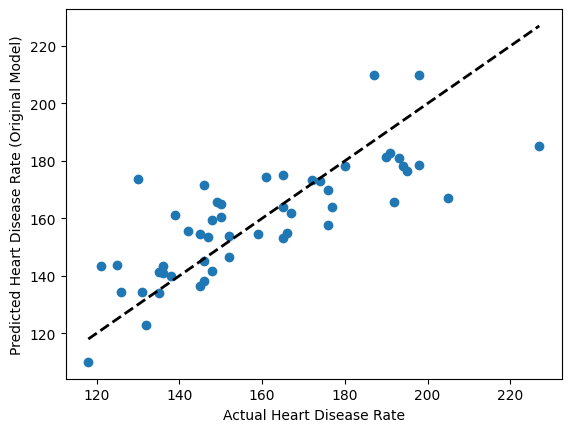

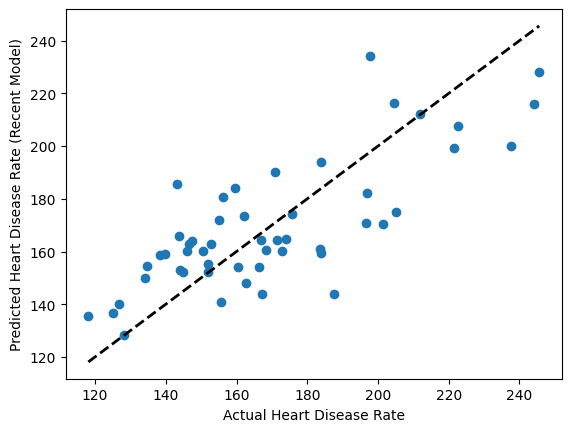

In [ ]:
import matplotlib.pyplot as plt

# Get the predicted values for the original model and the recent model
y_orig_pred = model_orig.predict(X_orig)
y_recent_pred = model_recent.predict(X_recent)

# Plot the predicted values against the actual values for the original model
plt.scatter(y_orig, y_orig_pred)
plt.plot([y_orig.min(), y_orig.max()], [y_orig.min(), y_orig.max()], 'k--', lw=2)
plt.xlabel('Actual Heart Disease Rate')
plt.ylabel('Predicted Heart Disease Rate (Original Model)')
plt.show()

# Plot the predicted values against the actual values for the recent model
plt.scatter(y_recent, y_recent_pred)
plt.plot([y_recent.min(), y_recent.max()], [y_recent.min(), y_recent.max()], 'k--', lw=2)
plt.xlabel('Actual Heart Disease Rate')
plt.ylabel('Predicted Heart Disease Rate (Recent Model)')
plt.show()
